In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('default')


In [35]:
trades = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')


In [36]:
print(trades.shape)
print(sentiment.shape)

trades.head()
sentiment.head()


(211224, 16)
(2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
trades.columns
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [45]:
# Trades: convert timestamp and normalize
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.normalize()

# Sentiment: convert Date and normalize
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.normalize()


In [47]:
print(trades['date'].dtype)
print(sentiment['date'].dtype)

trades[['Timestamp IST','date']].head()
sentiment[['date','date']].head()


datetime64[ns]
datetime64[ns]


,date,date
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


In [52]:
sentiment.rename(columns={'classification': 'Classification'}, inplace=True)
sentiment.rename(columns={'Fear Greed': 'Classification'}, inplace=True)

In [89]:
# Ensure numeric
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')

# Remove meaningless trades
merged_clean = merged[merged['Closed PnL'] != 0].copy()

print("Before cleaning:", merged.shape)
print("After cleaning :", merged_clean.shape)


Before cleaning: (35864, 19)
After cleaning : (17929, 19)


In [90]:
merged_clean['is_profitable'] = merged_clean['Closed PnL'] > 0



In [91]:
trader_perf_final = merged_clean.groupby(
    ['Account', 'Classification']
).agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_profitable', 'mean'),
    trade_count=('Closed PnL', 'count')
).reset_index()

trader_perf_final.head()


,Account,Classification,total_pnl,avg_pnl,win_rate,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.010607e+06,988.851878,0.860078,1022
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-4.501787e+04,-288.576108,0.788462,156
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2.826578e+03,33.253859,0.882353,85
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,8.758309e+03,24.881559,0.963068,352
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Neutral,2.517787e+03,39.964879,1.000000,63


In [92]:
merged_clean['sentiment_group'] = merged_clean['Classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})


In [93]:
sentiment_summary = merged_clean.groupby('sentiment_group').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_profitable', 'mean'),
    trade_count=('Closed PnL', 'count')
).reset_index()

sentiment_summary


,sentiment_group,total_pnl,avg_pnl,win_rate,trade_count
0,Fear,1.783626e+06,253.427894,0.849105,7038
1,Greed,1.766526e+06,191.597203,0.870933,9220
2,Neutral,7.465674e+04,44.677883,0.816278,1671


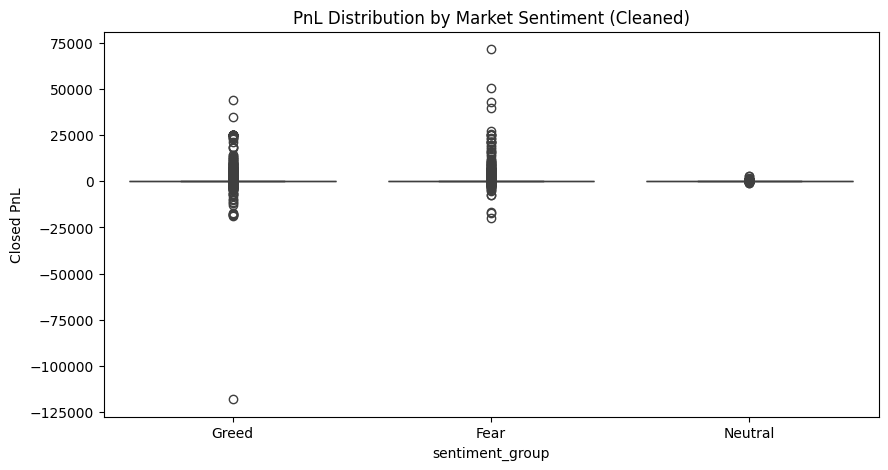

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=merged_clean, x='sentiment_group', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment (Cleaned)')
plt.savefig('pnl_by_sentiment.png', bbox_inches='tight')
plt.show()


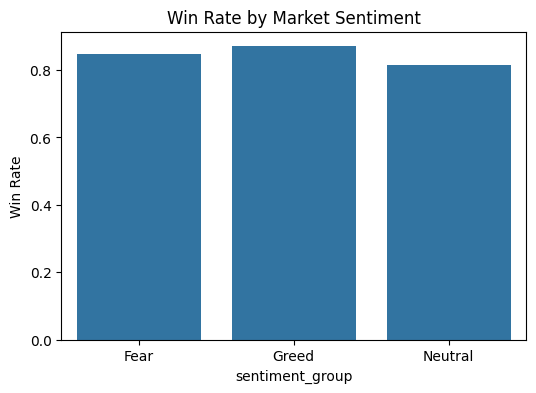

In [97]:
win_rate_plot = merged_clean.groupby('sentiment_group')['is_profitable'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate_plot, x='sentiment_group', y='is_profitable')
plt.ylabel('Win Rate')
plt.title('Win Rate by Market Sentiment')
plt.savefig('winrate_by_sentiment.png', bbox_inches='tight')
plt.show()


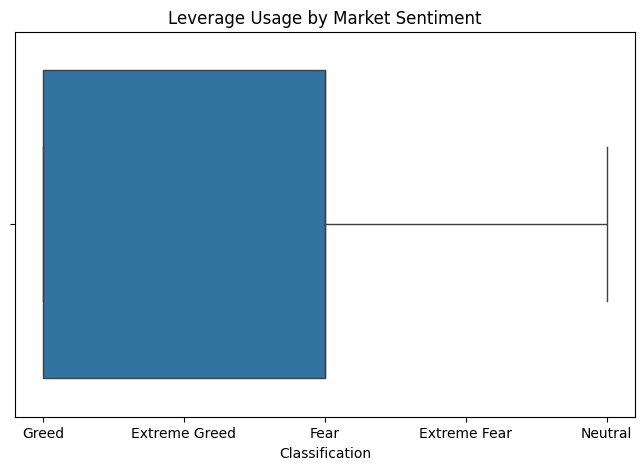

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='Classification') # 'y' argument for 'leverage' removed
plt.title('Leverage Usage by Market Sentiment')
plt.show()

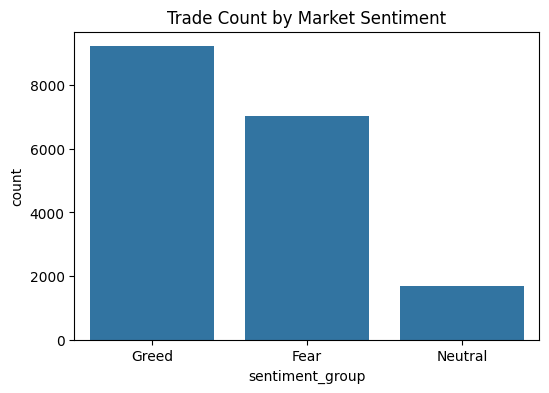

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_clean, x='sentiment_group')
plt.title('Trade Count by Market Sentiment')
plt.savefig('tradecount_by_sentiment.png', bbox_inches='tight')
plt.show()


In [99]:
sentiment_summary = merged_clean.groupby('sentiment_group').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_profitable', 'mean'),
    trade_count=('Closed PnL', 'count')
).reset_index()

sentiment_summary


,sentiment_group,total_pnl,avg_pnl,win_rate,trade_count
0,Fear,1.783626e+06,253.427894,0.849105,7038
1,Greed,1.766526e+06,191.597203,0.870933,9220
2,Neutral,7.465674e+04,44.677883,0.816278,1671
